# I. Import Libraries & Preferences

# Libraries and Preferences

In [ ]:
# Cell 1: Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

d:\OneDrive\Projects\finals-income-statement-analysis\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


# II. Exploratory Data Analysis

In [ ]:
# Cell 2: Load Data
# 1. Exploratory Data Analysis (EDA)
print("1. Exploratory Data Analysis")
print("Dataset Source: miga_summary_income_statement_26-10-2024.csv")

def load_csv():
    try:
        df = pd.read_csv('datasets/miga_summary_income_statement_26-10-2024.csv')
        print("\nSuccessfully loaded CSV file")
        return df
    except FileNotFoundError:
        print("Error: CSV file not found. Please ensure the file is in the correct directory.")
        return None
    except Exception as e:
        print(f"Error loading CSV file: {str(e)}")
        return None

df = load_csv()

1. Exploratory Data Analysis
Dataset Source: miga_summary_income_statement_26-10-2024.csv

Successfully loaded CSV file


# Preliminary Data Analysis

In [ ]:
# Cell 3: Initial Data Examination
def examine_data(df):
    if df is None:
        return None

    print("\nDataset Shape:", df.shape)
    print("\nColumns:", df.columns.tolist())
    print("\nFirst few rows:")
    print(df.head())
    print("\nSummary Statistics:")
    print(df.describe())
    print("\nData Types:")
    print(df.dtypes)
    return df

df = examine_data(df)


Dataset Shape: (73, 5)

Columns: ['Organization', 'Category', 'Line Item', 'Fiscal Year', 'Amount (US$, Millions)']

First few rows:
  Organization  Category                                         Line Item  \
0         MIGA  Expenses                   (Increase) Decrease in Reserves   
1         MIGA  Expenses  Administrative expenses (including Pension Cost)   
2         MIGA    Income                                 Investment Income   
3         MIGA    Income                                Net Premium Income   
4         MIGA  Expenses                           Translation (Loss) Gain   

   Fiscal Year  Amount (US$, Millions)  
0         2012                   -37.0  
1         2012                   -44.0  
2         2012                    37.0  
3         2012                    62.0  
4         2012                   -12.0  

Summary Statistics:
       Fiscal Year  Amount (US$, Millions)
count    73.000000               73.000000
mean   2018.273973               12.685014
s

# Data Cleaning and Processing

In [ ]:
# Cell 4: Data Cleaning and Processing
def clean_data(df):
    if df is None:
        return None

    print("\n2. Data Cleaning and Preprocessing")

    # Convert Amount to numeric
    df['Amount (US$, Millions)'] = pd.to_numeric(df['Amount (US$, Millions)'], errors='coerce')

    # Create pivot table
    pivot_df = df.pivot_table(
        index='Fiscal Year',
        columns='Line Item',
        values='Amount (US$, Millions)',
        aggfunc='first'
    ).fillna(0)

    print("\nMissing Values Before Cleaning:", df.isnull().sum().sum())
    print("Missing Values After Cleaning:", pivot_df.isnull().sum().sum())

    print("\nData Quality Checks:")
    print(f"Number of unique fiscal years: {df['Fiscal Year'].nunique()}")
    print(f"Number of unique line items: {df['Line Item'].nunique()}")
    print("\nUnique Line Items:")
    print(df['Line Item'].unique())

    return pivot_df

pivot_df = clean_data(df)


2. Data Cleaning and Preprocessing

Missing Values Before Cleaning: 0
Missing Values After Cleaning: 0

Data Quality Checks:
Number of unique fiscal years: 13
Number of unique line items: 8

Unique Line Items:
['(Increase) Decrease in Reserves'
 'Administrative expenses (including Pension Cost)' 'Investment Income'
 'Net Premium Income' 'Translation (Loss) Gain' 'Miscellaneous Income'
 'Investment Income (Loss) ' 'Investment Income (Loss)']


# III. Data Visualization

# Visualizing Income Trends per Fiscal Year

<Figure size 1200x600 with 0 Axes>

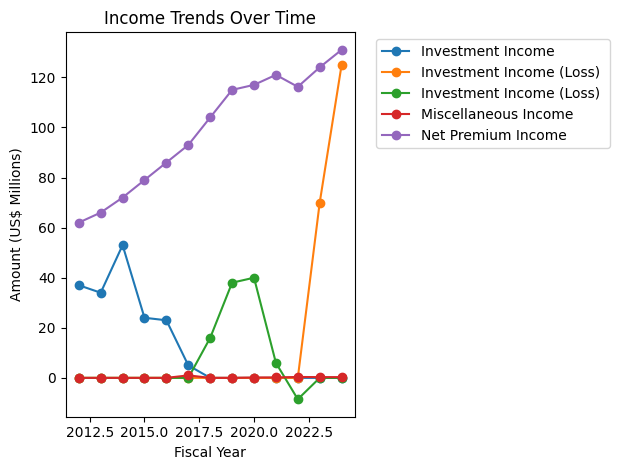

In [ ]:
# Cell 5: Income Trends Visualization
def plot_income_trends(pivot_df):
    plt.figure(figsize=(12, 6))
    income_cols = [col for col in pivot_df.columns if 'Income' in col]
    pivot_df[income_cols].plot(marker='o')
    plt.title('Income Trends Over Time')
    plt.xlabel('Fiscal Year')
    plt.ylabel('Amount (US$ Millions)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

plot_income_trends(pivot_df)

# Visualizing Expenses Trends per Fiscal Year

<Figure size 1200x600 with 0 Axes>

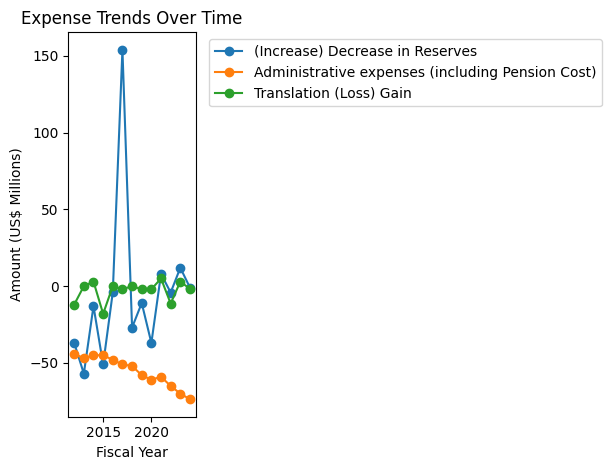

In [ ]:
# Cell 6: Expenses Trends Visualization
def plot_expense_trends(pivot_df):
    plt.figure(figsize=(12, 6))
    income_cols = [col for col in pivot_df.columns if 'Income' in col]
    expense_cols = [col for col in pivot_df.columns if col not in income_cols]
    pivot_df[expense_cols].plot(marker='o')
    plt.title('Expense Trends Over Time')
    plt.xlabel('Fiscal Year')
    plt.ylabel('Amount (US$ Millions)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

plot_expense_trends(pivot_df)

# Distribution of Net Premium Income (in Millions USD)

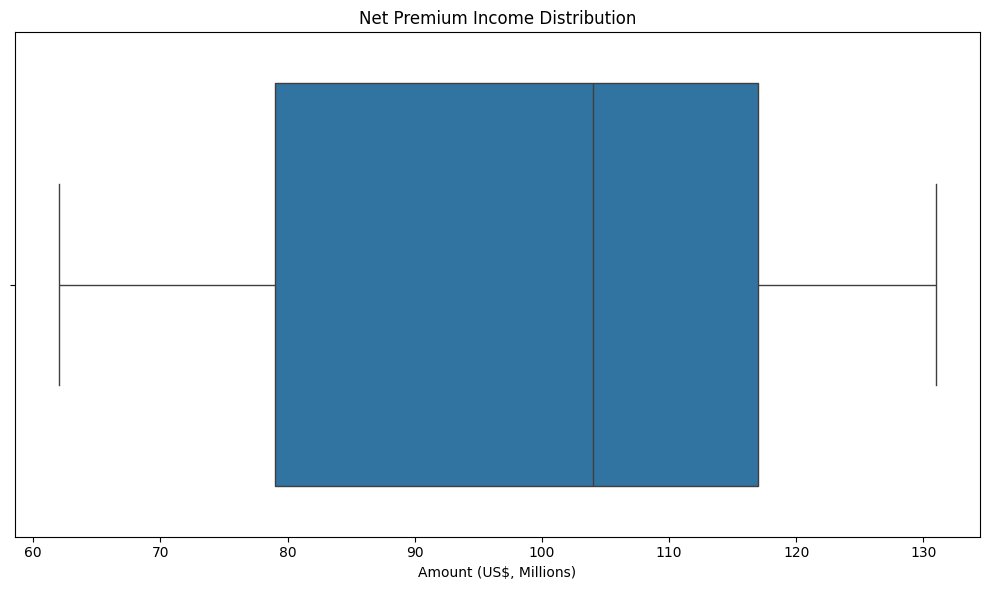

In [ ]:
# Cell 7: Net Premium Income Distribution
def plot_premium_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[df['Line Item'] == 'Net Premium Income']['Amount (US$, Millions)'])
    plt.title('Net Premium Income Distribution')
    plt.tight_layout()
    plt.show()

plot_premium_distribution(df)

# Correlation Heatmap of Financial Line Items: Reserves, Income, and Expenses

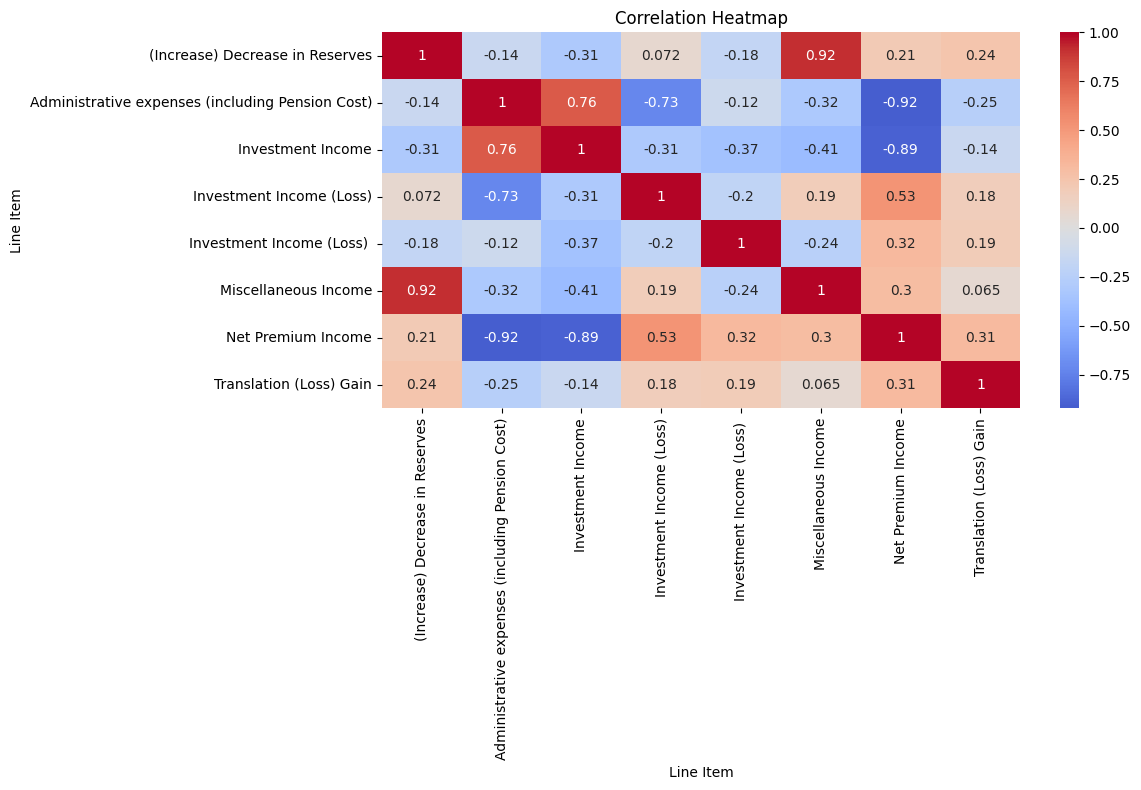

In [ ]:
# Cell 8: Correlation Heatmap
def plot_correlation_heatmap(pivot_df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_df.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

plot_correlation_heatmap(pivot_df)

# Annual Growth Trends in Financial Activity: 2012 - 2024

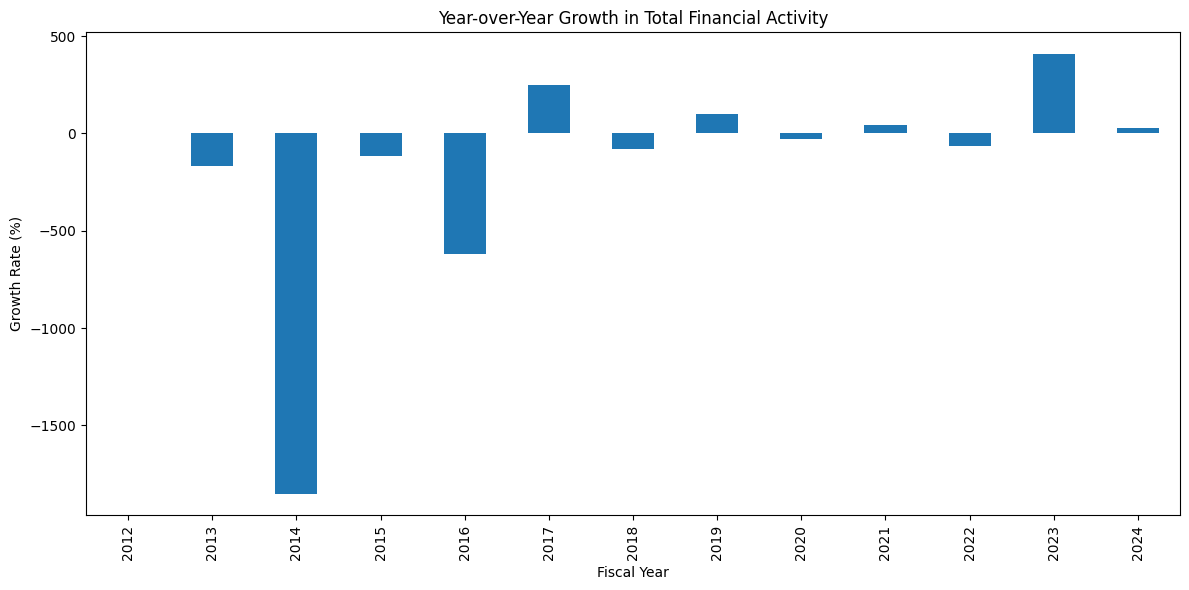

In [ ]:
# Cell 9: Year-over-Year Growth
def plot_yearly_growth(df):
    plt.figure(figsize=(12, 6))
    yearly_total = df.groupby('Fiscal Year')['Amount (US$, Millions)'].sum()
    yearly_growth = yearly_total.pct_change() * 100
    yearly_growth.plot(kind='bar')
    plt.title('Year-over-Year Growth in Total Financial Activity')
    plt.xlabel('Fiscal Year')
    plt.ylabel('Growth Rate (%)')
    plt.tight_layout()
    plt.show()

plot_yearly_growth(df)

# IV. Model Development and Evaluation

# Developing the Model

In [ ]:
# Cell 10: Model Development
from sklearn.ensemble import GradientBoostingRegressor

def develop_models(pivot_df):
    if pivot_df is None:
        return None

    print("\n4. Model Development")

    target = 'Net Premium Income'
    features = [col for col in pivot_df.columns if col != target]

    X = pivot_df[features]
    y = pivot_df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'Prophet': Prophet()
    }

    results = {}

    for name, model in models.items():
        if name != 'Prophet':
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            results[name] = {
                'R2 Score': r2_score(y_test, y_pred),
                'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
            }
        else:
            prophet_df = pd.DataFrame({
                'ds': pd.to_datetime(pivot_df.index.astype(str)),
                'y': pivot_df[target]
            })
            model.fit(prophet_df)
            future = model.make_future_dataframe(periods=1, freq='Y')
            forecast = model.predict(future)
            results[name] = {
                'R2 Score': r2_score(prophet_df['y'],
                                   forecast['yhat'][:len(prophet_df)]),
                'RMSE': np.sqrt(mean_squared_error(prophet_df['y'],
                                                 forecast['yhat'][:len(prophet_df)]))
            }

    return results

results = develop_models(pivot_df)



4. Model Development


19:32:25 - cmdstanpy - INFO - Chain [1] start processing
19:32:25 - cmdstanpy - INFO - Chain [1] done processing


# Model Assessment

In [ ]:
# Cell 11: Model Evaluation
def evaluate_models(results):
    if results is None:
        return

    print("\n5. Model Evaluation")
    print("\nModel Performance Metrics:")
    for model, metrics in results.items():
        print(f"\n{model}:")
        print(f"R² Score: {metrics['R2 Score']:.4f}")
        print(f"RMSE: {metrics['RMSE']:.4f}")
        accuracy = (1 - metrics['RMSE']/100)
        print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

evaluate_models(results)



5. Model Evaluation

Model Performance Metrics:

Linear Regression:
R² Score: 0.9070
RMSE: 8.7073
Accuracy: 0.9129 (91.29%)

Random Forest:
R² Score: 0.9272
RMSE: 7.7038
Accuracy: 0.9230 (92.30%)

Gradient Boosting:
R² Score: 0.9205
RMSE: 8.0478
Accuracy: 0.9195 (91.95%)

Prophet:
R² Score: 0.9851
RMSE: 2.7996
Accuracy: 0.9720 (97.20%)


# V. Documentation and Final Report

In [ ]:
# Cell 12: Documentation and Final Report
def generate_documentation(df, pivot_df, results):
    if df is None or pivot_df is None or results is None:
        return

    print("\n6. Documentation")
    print("\nProject Analysis Report")
    print("=====================")

    print("\nData Overview:")
    print(f"- Time period covered: {df['Fiscal Year'].min()} to {df['Fiscal Year'].max()}")
    print(f"- Number of financial metrics tracked: {len(df['Line Item'].unique())}")

    print("\nKey Findings:")
    print("1. Income Trends:")
    for col in [c for c in pivot_df.columns if 'Income' in c]:
        initial_value = pivot_df[col].iloc[0]
        final_value = pivot_df[col].iloc[-1]

        # Handle division by zero and missing values
        if initial_value == 0 or pd.isna(initial_value) or pd.isna(final_value):
            growth = "N/A"
        else:
            growth = ((final_value - initial_value) / initial_value) * 100

        # Print the formatted growth or N/A
        if growth == "N/A":
            print(f"   - {col}: N/A growth over the period")
        else:
            print(f"   - {col}: {growth:.1f}% growth over the period")

    print("\n2. Expense Analysis:")
    for col in [c for c in pivot_df.columns if 'expense' in c.lower()]:
        avg = pivot_df[col].mean()
        print(f"   - Average {col}: ${avg:.1f}M")

    print("\n3. Model Performance Summary:")
    best_model = max(results.items(), key=lambda x: x[1]['R2 Score'])
    print(f"   - Best performing model: {best_model[0]}")
    print(f"   - R² Score: {best_model[1]['R2 Score']:.4f}")
    print(f"   - RMSE: {best_model[1]['RMSE']:.4f}")

    print("\nRecommendations:")
    print("1. Continue monitoring Net Premium Income growth trends")
    print("2. Review administrative expenses for optimization opportunities")
    print("3. Consider implementing the best-performing model for future predictions")

generate_documentation(df, pivot_df, results)



6. Documentation

Project Analysis Report

Data Overview:
- Time period covered: 2012 to 2024
- Number of financial metrics tracked: 8

Key Findings:
1. Income Trends:
   - Investment Income: -100.0% growth over the period
   - Investment Income (Loss): N/A growth over the period
   - Investment Income (Loss) : N/A growth over the period
   - Miscellaneous Income: N/A growth over the period
   - Net Premium Income: 111.3% growth over the period

2. Expense Analysis:
   - Average Administrative expenses (including Pension Cost): $-55.3M

3. Model Performance Summary:
   - Best performing model: Prophet
   - R² Score: 0.9851
   - RMSE: 2.7996

Recommendations:
1. Continue monitoring Net Premium Income growth trends
2. Review administrative expenses for optimization opportunities
3. Consider implementing the best-performing model for future predictions


#VI. Interactive Prediction Model System

In [ ]:
# Cell 13: Interactive Prediction System (Fixed)

# First, ensure we have our global variables
if 'pivot_df' not in globals() or 'results' not in globals():
    print("Please run the previous cells first to prepare the data and train the models.")
else:
    def get_user_input(pivot_df):
        """Get user input for model selection and prediction parameters"""
        print("\nRevenue/Expense Forecasting System")
        print("==================================")

        # Display model options
        print("\nAvailable Models:")
        print("1. Linear Regression")
        print("2. Random Forest")
        print("3. Gradient Boosting")
        print("4. Prophet")

        # Get model choice
        while True:
            try:
                model_choice = int(input("\nSelect a model (1-4): "))
                if 1 <= model_choice <= 4:
                    break
                print("Please enter a number between 1 and 4.")
            except ValueError:
                print("Please enter a valid number.")

        # Map model choice to model name
        model_names = {
            1: "Linear Regression",
            2: "Random Forest",
            3: "Gradient Boosting",
            4: "Prophet"
        }

        selected_model = model_names[model_choice]

        # Get prediction type
        print("\nPrediction Type:")
        print("1. Revenue (Net Premium Income)")
        print("2. Expense (Administrative expenses)")

        while True:
            try:
                pred_type = int(input("\nSelect prediction type (1-2): "))
                if 1 <= pred_type <= 2:
                    break
                print("Please enter either 1 or 2.")
            except ValueError:
                print("Please enter a valid number.")

        prediction_type = "Revenue" if pred_type == 1 else "Expense"

        # Get feature inputs based on historical data columns
        feature_inputs = {}
        if selected_model != "Prophet":
            print("\nPlease enter the following financial metrics (in US$ Millions):")
            print("(These are the required inputs based on historical data)")

            # Show current year's values as reference
            latest_year = pivot_df.index.max()
            print(f"\nReference values from {latest_year}:")

            # Define target columns
            revenue_col = "Net Premium Income"
            expense_col = "Administrative expenses (including Pension Cost)"
            target_col = revenue_col if prediction_type == "Revenue" else expense_col

            # Show and collect inputs for all columns except the target
            for column in pivot_df.columns:
                if column != target_col:
                    print(f"{column}: {pivot_df.loc[latest_year, column]:.2f}")

            print("\nEnter your input values:")
            for column in pivot_df.columns:
                if column != target_col:
                    while True:
                        try:
                            value = float(input(f"{column}: "))
                            feature_inputs[column] = value
                            break
                        except ValueError:
                            print("Please enter a valid number.")
        else:
            # For Prophet, we only need the date
            latest_year = pivot_df.index.max()
            while True:
                try:
                    future_date = int(input(f"\nEnter forecast year (current latest year is {latest_year}): "))
                    if future_date > latest_year and future_date <= latest_year + 10:
                        feature_inputs['forecast_year'] = future_date
                        break
                    print(f"Please enter a year between {latest_year + 1} and {latest_year + 10}.")
                except ValueError:
                    print("Please enter a valid year.")

        return selected_model, prediction_type, feature_inputs

    def make_prediction(model_name, prediction_type, features, pivot_df):
        """Make predictions using the selected model and inputs"""
        try:
            # Define target columns
            revenue_col = "Net Premium Income"
            expense_col = "Administrative expenses (including Pension Cost)"
            target_col = revenue_col if prediction_type == "Revenue" else expense_col

            if model_name == "Prophet":
                # Handle Prophet predictions
                prophet_model = Prophet()

                # Prepare historical data
                prophet_df = pd.DataFrame({
                    'ds': pd.to_datetime(pivot_df.index.astype(str)),
                    'y': pivot_df[target_col]
                })

                # Fit model and make prediction
                prophet_model.fit(prophet_df)
                future_date = pd.DataFrame({'ds': [pd.to_datetime(str(features['forecast_year']))]})
                forecast = prophet_model.predict(future_date)
                prediction = forecast['yhat'].iloc[0]

            else:
                # Handle other models
                # Prepare input features
                input_features = np.array(list(features.values())).reshape(1, -1)

                # Scale features
                scaler = StandardScaler()
                X = pivot_df.drop(target_col, axis=1)
                X_scaled = scaler.fit_transform(X)
                input_scaled = scaler.transform(input_features)

                # Select appropriate model
                if model_name == "Linear Regression":
                    model = LinearRegression()
                elif model_name == "Random Forest":
                    model = RandomForestRegressor(random_state=42)
                else:  # Gradient Boosting
                    model = GradientBoostingRegressor(random_state=42)

                # Train model and make prediction
                model.fit(X_scaled, pivot_df[target_col])
                prediction = model.predict(input_scaled)[0]

            return prediction

        except Exception as e:
            print(f"Error making prediction: {str(e)}")
            return None

    def run_interactive_prediction(pivot_df, results):
        """Run the interactive prediction system"""
        try:
            # Get user inputs
            model_name, prediction_type, features = get_user_input(pivot_df)

            print("\nMaking prediction...")
            prediction = make_prediction(model_name, prediction_type, features, pivot_df)

            if prediction is not None:
                print(f"\nPredicted {prediction_type}: ${prediction:.2f}M")
                print("\nConfidence Metrics for Selected Model:")
                print(f"R² Score: {results[model_name]['R2 Score']:.4f}")
                print(f"RMSE: {results[model_name]['RMSE']:.4f}")

            # Ask if user wants to make another prediction
            while True:
                another = input("\nWould you like to make another prediction? (yes/no): ").lower()
                if another in ['yes', 'no']:
                    if another == 'yes':
                        run_interactive_prediction(pivot_df, results)
                    break
                print("Please enter 'yes' or 'no'.")

        except Exception as e:
            print(f"Error in prediction system: {str(e)}")

    # Run the interactive prediction system with the global variables
    run_interactive_prediction(pivot_df, results)


Revenue/Expense Forecasting System

Available Models:
1. Linear Regression
2. Random Forest
3. Gradient Boosting
4. Prophet

Prediction Type:
1. Revenue (Net Premium Income)
2. Expense (Administrative expenses)

Please enter the following financial metrics (in US$ Millions):
(These are the required inputs based on historical data)

Reference values from 2024:
(Increase) Decrease in Reserves: -0.99
Administrative expenses (including Pension Cost): -73.68
Investment Income: 0.00
Investment Income (Loss): 125.00
Investment Income (Loss) : 0.00
Miscellaneous Income: 0.30
Translation (Loss) Gain: -1.77

Enter your input values:

Making prediction...

Predicted Revenue: $-4.92M

Confidence Metrics for Selected Model:
R² Score: 0.9070
RMSE: 8.7073
